In [1]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
sentiment_results = pd.read_pickle("../results/bert_reviews_sentiment.pkl")

In [3]:
print(type(sentiment_results))
print(type(sentiment_results[0][0]))
print(type(sentiment_results[0][0][0]))

<class 'list'>
<class 'list'>
<class 'dict'>


In [4]:
# Predicted probabilities for a random review
sentiment_results[100][0]

[{'label': '4 stars', 'score': 0.39698728919029236},
 {'label': '5 stars', 'score': 0.26868367195129395},
 {'label': '3 stars', 'score': 0.17163942754268646},
 {'label': '2 stars', 'score': 0.11501819640398026},
 {'label': '1 star', 'score': 0.047671422362327576}]

In [5]:
results_list = []
for i in sentiment_results:
    # Grab highest probability label of review
    results_list.append(i[0][0])
results_df = pd.DataFrame.from_dict(results_list)
print(results_df.shape)

(583, 2)


In [6]:
reviews = pd.read_pickle("../data/user_review.pkl")
print(reviews.shape)
review_lengths = []
for review in reviews["Comment"]:
    review_lengths.append(len(word_tokenize(review)))

(594, 4)


In [7]:
# Indices we want to remove from our original reviews data frame
ind_remove = np.where(np.asarray(review_lengths)>=400)[0]
reviews.drop(index=ind_remove, inplace=True)
reviews.reset_index(drop=True, inplace=True)
print(reviews.shape)

(583, 4)


In [8]:
# Combine predicted review ratings
sentiment_df = pd.concat([reviews, results_df], axis=1)
sentiment_df["label_clean"] = sentiment_df["label"].str.get(0).astype(int)

In [9]:
print("Absolute accuracy:",
      round(100*sum(sentiment_df["Rating"]==sentiment_df["label_clean"])/len(sentiment_df), 2),
      "%")

Absolute accuracy: 54.37 %


In [10]:
acc_within_1 = 0
for ind in range(0,len(sentiment_df)):
    if int(sentiment_df.iloc[ind, 2]) == sentiment_df.iloc[ind, 6]:
        acc_within_1 += 1
    elif abs(int(sentiment_df.iloc[ind, 2]) - sentiment_df.iloc[ind, 6]) == 1:
        acc_within_1 += 1

print("Accuracy within 1 star:",
      round(100*acc_within_1/len(sentiment_df), 2),
      "%")

Accuracy within 1 star: 94.85 %


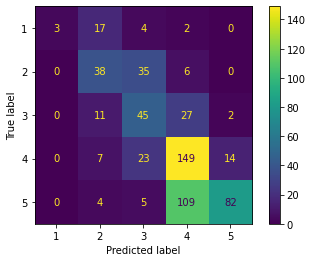

In [11]:
conf_matrix = metrics.confusion_matrix(sentiment_df["Rating"], sentiment_df["label_clean"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3,4,5])

cm_display.plot()
plt.show()